In [4]:
import numpy as np
from scipy.interpolate import CubicSpline
import math


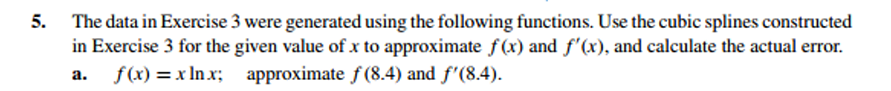

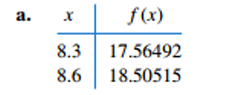

In [5]:
x = np.array([8.3, 8.6])  # x-coordinates
y = np.array([17.56492, 18.50515])  # y-coordinates

def f(x):
    return x * math.log(x)

cs = CubicSpline(x=x, y=y, bc_type='natural')
print(f"Giá trị nội suy tại 8.4: f(8.4) = {cs(8.4)}")
print(f"==> Sai số là: error = {abs(f(8.4) - cs(8.4))}")
print(f"Giá trị đạo hàm nội suy tại 8.4: f'(8.4) = {cs(8.4, 1)}")
print(f"==> Sai số là: error = {abs(((f(8.4) - f(8.4 + 1e-9)) / -1e-9) - cs(8.4, 1))}")


Giá trị nội suy tại 8.4: f(8.4) = 17.878330000000002
==> Sai số là: error = 0.0011836708661512318
Giá trị đạo hàm nội suy tại 8.4: f'(8.4) = 3.13410000000001
==> Sai số là: error = 0.0058645515425928


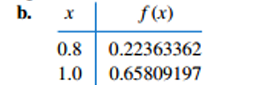

In [8]:
def f(x):
    return math.sin(math.exp(x) - 2)

x = np.array([0.8, 1.0])  # x-coordinates
y = np.array([f(i) for i in x])  # y-coordinates

cs = CubicSpline(x=x, y=y, bc_type='natural')
print(f"Giá trị nội suy tại 0.8: f(0.8) = {cs(0.9)}")
print(f"==> Sai số là: error = {abs(f(0.9) - cs(0.9))}")
print(f"Giá trị đạo hàm nội suy tại 0.9: f'(0.9) = {cs(0.9, 1)}")
print(f"==> Sai số là: error = {abs(((f(0.9) - f(0.9 + 1e-9)) / -1e-9) - cs(0.9, 1))}")


Giá trị nội suy tại 0.8: f(0.8) = 0.4408627957409615
==> Sai số là: error = 0.0027296430293199947
Giá trị đạo hàm nội suy tại 0.9: f'(0.9) = 2.172291723689928
==> Sai số là: error = 0.03207468793898283


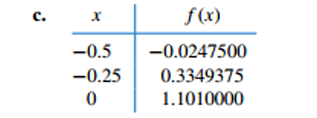

In [9]:
def f(x):
    return x ** 3 + 4.001 * x ** 2 + 4.002 * x + 1.101

x = np.array([-0.5, -0.25, 0])  # x-coordinates
y = np.array([f(i) for i in x])  # y-coordinates

cs = CubicSpline(x=x, y=y, bc_type='natural')
print(f"Giá trị nội suy tại -1/3: f(-1/3) = {cs(-1/3)}")
print(f"==> Sai số là: error = {abs(f(-1/3) - cs(-1/3))}")
print(f"Giá trị đạo hàm nội suy tại -1/3: f'(-1/3) = {cs(-1/3, 1)}")
print(f"==> Sai số là: error = {abs(((f(-1/3) - f(-1/3 + 1e-9)) / -1e-9) - cs(-1/3, 1))}")


Giá trị nội suy tại -1/3: f(-1/3) = 0.17741435185185206
==> Sai số là: error = 0.0028958333333333197
Giá trị đạo hàm nội suy tại -1/3: f'(-1/3) = 1.574208333333333
==> Sai số là: error = 0.0937916270419219


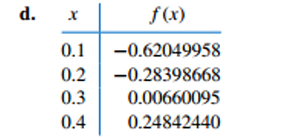

Giá trị nội suy tại 0.25: f(0.25) = -0.131557147875
==> Sai số là: error = 0.001214746697338842
Giá trị đạo hàm nội suy tại 0.25: f'(0.25) = 2.9089813708333336
==> Sai số là: error = 0.001919890405036817


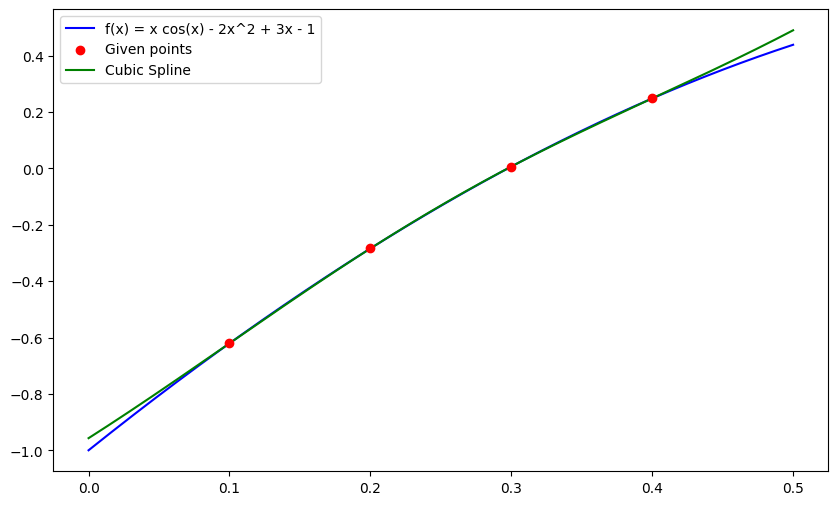

In [19]:
import matplotlib.pyplot as plt

def f(x):
    return x * np.cos(x) - 2 * x**2 + 3 * x - 1

x_values = np.linspace(0, 0.5, 400)
y_values = f(x_values)

x = np.array([0.1, 0.2, 0.3, 0.4])
y = np.array([-0.62049958, -0.28398668, 0.006660095, 0.24842440])

cs = CubicSpline(x=x, y=y, bc_type='natural')
print(f"Giá trị nội suy tại 0.25: f(0.25) = {cs(0.25)}")
print(f"==> Sai số là: error = {abs(f(0.25) - cs(0.25))}")
print(f"Giá trị đạo hàm nội suy tại 0.25: f'(0.25) = {cs(0.25, 1)}")
print(f"==> Sai số là: error = {abs(((f(0.25) - f(0.25 + 1e-9)) / -1e-9) - cs(0.25, 1))}")

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='f(x) = x cos(x) - 2x^2 + 3x - 1', color='blue')
plt.scatter(x, y, color='red', zorder=5, label='Given points')
plt.plot(x_values, cs(x_values), label='Cubic Spline', color='green')
plt.legend()

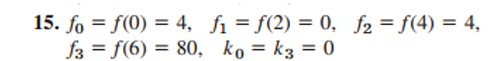

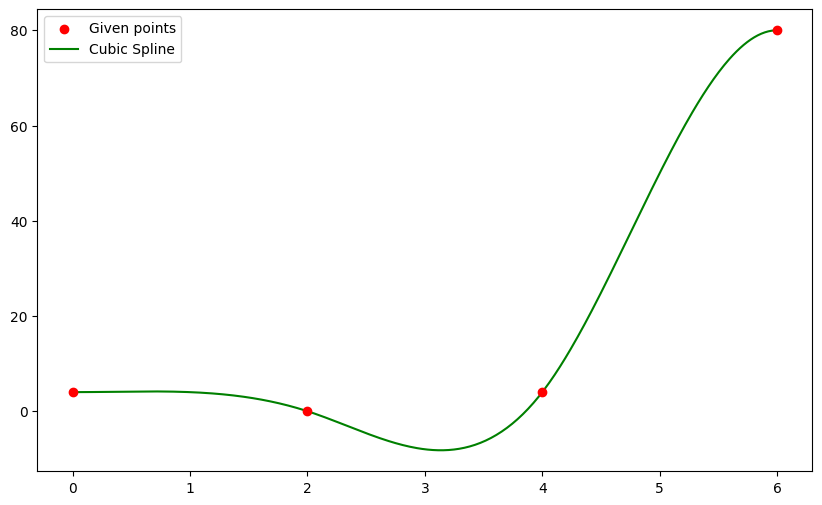

In [20]:
x = np.array([0, 2, 4, 6])  # x-coordinates
y = np.array([4, 0, 4, 80])  # y-coordinates
x_values = np.linspace(0, 6, 400)

cs = CubicSpline(x=x, y=y, bc_type='clamped')


plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='red', zorder=5, label='Given points')
plt.plot(x_values, cs(x_values), label='Cubic Spline', color='green')
plt.legend()